In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

cate = "c2kegg"
pcc = ""
path_topo = "degree_entropy" #eigne_centrality closeness  edgebetween
gr = "primaryEver"
#df_eigne_centrality = pd.read_csv("topolgy_property/c2_pathway_closeness_{gr}.txt")
df_eigne_centrality = pd.read_csv(f"{cate}{pcc}_pathway_{path_topo}_{gr}.txt",sep="\t",index_col=0)
#df_eigne_centrality.set_index("pathway",inplace=True)
df_eigne_centrality.T

In [43]:
cate = "c2"
pcc = ""
path_topo = "closeness" #eigne_centrality closeness  edgebetween
gr = "metaEver"
#df_eigne_centrality = pd.read_csv("topolgy_property/c2_pathway_closeness_{gr}.txt")
df_eigne_centrality = pd.read_csv(f"topolgy_property/{cate}{pcc}_pathway_{path_topo}_{gr}.txt")
#df_eigne_centrality = pd.read_csv(f"topolgy_property/{cate}{pcc}_pathway_closeness_{gr}.txt")
#df_eigne_centrality = pd.read_csv(f"topolgy_property/{cate}_pathway_edgebetween_{gr}.txt")
df_eigne_centrality.set_index("pathway",inplace=True)
df_eigne_centrality

,EA595455,EA595585,EA595628,EA595650,EA595653,EA595668,EA595711,EA632702,EA632753,EA632772,...,P66432-05G-Run1_S6_L001,P66432-08B-Run1_S23_L002,P66451-02H-Run1_S22_L002,P66451-04A-Run1_S2_L001,P66451-08A-Run1_S21_L002,P66507-01G-Run1_S20_L002,P66507-08F-Run1_S22_L002,P66511-01B-Run1_S15_L002,P66511-04E-Run1_S4_L001,P66511-09E-Run1_S29_L002
pathway,,,,,,,,,,,,,,,,,,,,,
KEGG_N_GLYCAN_BIOSYNTHESIS,nan_0.5413936572687579_nan_nan_0.5215005747534...,0.3331464919871295_0.36155669306673915_0.39785...,nan_nan_nan_1.5963939017101323_0.6026058895425...,0.3560987290035251_nan_0.48041156878961233_0.3...,0.37667580532427986_nan_nan_0.3987001282646639...,1.7364366855771072_0.46160210560014114_nan_nan...,0.4311503617808562_nan_nan_1.7887767347550143_...,0.4511311131710876_nan_nan_0.43617785195335435...,nan_nan_nan_0.45514000460445053_0.473094755002...,0.46694085494645604_nan_nan_1.5954156456707689...,...,0.43484424440875763_nan_nan_1.6358534968987186...,0.6852362982417379_0.46561959821705096_nan_0.5...,0.4198382488977657_nan_nan_0.5626097260013535_...,0.4126490758443491_nan_nan_0.4704017654925389_...,nan_nan_0.7502329501355204_1.4264208441427189_...,0.43670132436243114_nan_1.6172074449270928_1.5...,nan_nan_0.6206230642588062_0.6241088703533618_...,nan_nan_0.418562301715176_0.3063508813139982_0...,nan_nan_0.42463914233241645_0.6779205202772584...,0.5378075232266603_nan_1.689780965511626_0.422...
KEGG_OTHER_GLYCAN_DEGRADATION,nan_1.0373177804698697_1.5426980953843228_nan_...,nan_1.3468511002132662_0.8975264891251877_nan_...,nan_1.0359326188383755_1.5364586519109684_nan_...,1.032067628578052_1.5381881824556447_0.6572968...,nan_1.0292835344000868_1.5321842109653656_nan_...,nan_1.0510631505179764_1.5563238077433732_nan_...,nan_1.041873057365723_1.5468994683837727_nan_1...,nan_1.057030019587492_0.6466121899248469_nan_1...,nan_1.0091199913808004_1.5175538771872796_0.62...,nan_1.0375686924414427_1.5394203559086346_nan_...,...,1.0329857623735668_1.5370044201006288_0.635707...,nan_1.0231703922350053_1.522653847065338_0.654...,nan_0.9735876607264983_1.6077711030534738_nan_...,nan_1.026899898903252_1.5281723295552119_nan_1...,nan_1.0966568791640843_nan_0.6420553406217274_...,1.0338125189641092_0.6540427010146258_nan_1.01...,1.1220479244298376_nan_1.0435923884096647_1.55...,nan_1.0332129925475282_1.5366970568812162_0.65...,nan_1.038382987369254_1.5424615412020486_0.525...,1.2563603780623411_1.3695512153654477_1.241387...
KEGG_O_GLYCAN_BIOSYNTHESIS,1.635379920557214_nan_nan_nan_1.64723670854095...,nan_nan_nan_nan_1.6121504146802577_1.612150414...,nan_nan_nan_nan_1.5941801444884862_1.594180144...,nan_nan_nan_nan_1.6488153521921762_1.648815352...,nan_nan_nan_nan_1.6127443588822825_1.612744358...,nan_nan_nan_1.5674952122349843_nan_nan_nan_nan...,nan_nan_1.6351474217330584_1.6351474217330584_...,nan_nan_nan_1.6669095652293076_nan_nan_nan_nan...,nan_nan_nan_1.63522706661889_1.63522706661889_...,nan_nan_1.6272990701368808_1.6272990701368808_...,...,nan_nan_nan_1.1050728646059593_1.6844342500157...,nan_nan_nan_nan_nan_1.6194094140625346_1.61940...,nan_nan_nan_1.6210350671018243_1.6210350671018...,nan_nan_nan_1.6284572991964592_1.6284572991964...,nan_nan_nan_1.6180160021469636_1.6180160021469...,1.3125507248417043_nan_nan_nan_1.6248414455791...,nan_nan_nan_nan_nan_1.6543808600672283_1.65438...,nan_nan_nan_1.5890438901320287_1.5890438901320...,nan_1.796331565653701_nan_1.7092547332013883_1...,1.064835789951319_0.6783028553150249_0.8471539...
KEGG_GLYCOSAMINOGLYCAN_DEGRADATION,nan_nan_1.5573708861589806_nan_1.6353461771147...,nan_1.7201661218416502_nan_nan_0.7177483157126...,1.7871701778394582_nan_nan_nan_0.7321949321173...,nan_nan_nan_nan_0.7275140130207564_0.989295381...,1.775371791953321_nan_nan_1.6349384662308557_1...,nan_1.8056425922900232_nan_nan_nan_1.574001466...,nan_0.6822302061342692_0.6505919653952574_nan_...,1.7054166698364654_nan_nan_0.8079719400526955_...,nan_1.7923965860383475_nan_nan_nan_1.573582666...,nan_1.7485555148548018_nan_nan_0.7335508096100..

In [44]:
def trans_alist(alist):
    if type(alist) == int:
        return 0
    if type(alist) == float:
        return 0
    elif len(alist) > 0:
        thelist = alist.split("_")
        #print(alist)
        thelist = pd.Series(thelist)
        #thelist.fillna(0,inplace=True)
        #thelist = [float(i) for i in thelist if i != np.nan]
        #print(thelist)
        if thelist.sum() == 0:
            return 0
        else:
            #print(thelist.astype('float').sum(),thelist.count())
            return thelist.astype('float').sum()/thelist.count()
    else:
        return 0


In [45]:
df_eigne_centrality.fillna(0,inplace=True)
df_ave= df_eigne_centrality.applymap(trans_alist).copy()

/tmp/ipykernel_118627/1407144469.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_ave= df_eigne_centrality.applymap(trans_alist).copy()


In [46]:
print(df_ave.shape)

(186, 37)


In [47]:
df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")
df_os = pd.merge(df_ave.T.reset_index(),df_cl,how='left', left_on="index", right_on="RNA_ID")
df_os.shape

(37, 200)

In [48]:
from lifelines import CoxPHFitter
df_cox_os = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['OS', 'OS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
        df_cox_os = pd.concat([df_cox_os,cph.summary])
    except:
        print("not working")
print("done")
df_cox_pfs = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['PFS', 'PFS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
        df_cox_pfs = pd.concat([df_cox_pfs,cph.summary])
    except:
        print("not working")

/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_CIRCADIAN_RHYTHM_MAMMAL'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


not working


/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1676: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1728: RuntimeWarning: divide by zero encountered in divide
  denom = 1.0 / np.array([risk_phi])
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1730: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1732: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1737: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, beta) + weighted_average * log(denom).sum()
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1737: RuntimeWarning: invalid value encountered i

not working
not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column KEGG_SULFUR_METABOLISM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['OS_CNSR'].astype(bool)
>>> print(df.loc[events, 'KEGG_SULFUR_METABOLISM'].var())
>>> print(df.loc[~events, 'KEGG_SULFUR_METABOLISM'].var())

A very low variance means that the column KEGG_SULFUR_METABOLISM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.164. This may imply non-unique solutions to the maximum likeli

done


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_CIRCADIAN_RHYTHM_MAMMAL'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


not working


/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: divide by zero encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


not working


/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1676: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1730: RuntimeWarning: invalid value encountered in multiply
  a1 = risk_phi_x_x * denom
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1732: RuntimeWarning: invalid value encountered in multiply
  summand = numer * denom[:, None]
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1737: RuntimeWarning: divide by zero encountered in log
  log_lik = log_lik + dot(x_death_sum, beta) + weighted_average * log(denom).sum()
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1724: RuntimeWarning: invalid value encountered in multiply
  denom = 1.0 / (risk_phi - increasing_proportion * tie_phi)
/opt/conda/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1724: RuntimeWarning: in

not working


In [49]:
os_list = df_cox_os[df_cox_os["p"]<0.05].index.tolist()
pfs_list = df_cox_pfs[df_cox_pfs["p"]<0.05].index.tolist()
sign_list = list(set(os_list).intersection(pfs_list))
#sign_list = list(set(os_list).union(pfs_list))
print(len(os_list),len(pfs_list),len(sign_list))

8 10 2


In [50]:
dfos_detail = pd.concat([df_os[df_os["Benefit"]=="CB"][os_list].mean(),df_os[df_os["Benefit"]=="NCB"][os_list].mean()],axis=1)
dfos_detail.columns = ["CB","NCB"]
dfos_detail.to_csv(f"{cate}_{pcc}_{path_topo}_{gr}_os_sign_path.corr.txt")
print(dfos_detail)


                                                    CB       NCB
KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM   0.066131  0.070747
KEGG_BASAL_TRANSCRIPTION_FACTORS              0.444495  0.472552
KEGG_STEROID_HORMONE_BIOSYNTHESIS             0.583007  0.526678
KEGG_NUCLEOTIDE_EXCISION_REPAIR               0.551297  0.591069
KEGG_ERBB_SIGNALING_PATHWAY                   0.423874  0.397144
KEGG_CALCIUM_SIGNALING_PATHWAY                0.359021  0.385463
KEGG_TGF_BETA_SIGNALING_PATHWAY               0.318089  0.366559
KEGG_PROGESTERONE_MEDIATED_OOCYTE_MATURATION  0.289835  0.337941


In [51]:
dfos_detail = pd.concat([df_os[df_os["Benefit"]=="CB"][pfs_list].mean(),df_os[df_os["Benefit"]=="NCB"][pfs_list].mean()],axis=1)
dfos_detail.columns = ["CB","NCB"]
print(dfos_detail)
dfos_detail.to_csv(f"{cate}_{pcc}_{path_topo}_{gr}_pfs_sign_path.corr.txt")

                                              CB       NCB
KEGG_GALACTOSE_METABOLISM               0.390808  0.413210
KEGG_ASCORBATE_AND_ALDARATE_METABOLISM  0.641401  0.597148
KEGG_STEROID_HORMONE_BIOSYNTHESIS       0.583007  0.526678
KEGG_TYROSINE_METABOLISM                0.444858  0.436185
KEGG_MISMATCH_REPAIR                    0.450693  0.494906
KEGG_TGF_BETA_SIGNALING_PATHWAY         0.318089  0.366559
KEGG_VEGF_SIGNALING_PATHWAY             0.447119  0.469527
KEGG_OLFACTORY_TRANSDUCTION             0.366547  0.370876
KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS  0.497767  0.469022
KEGG_BASAL_CELL_CARCINOMA               0.388870  0.417447


import scipy
plist = []
for i in sign_list:
    cb = df_os[df_os["Benefit"]=="CB"][i].tolist()
    ncb = df_os[df_os["Benefit"]=="NCB"][i].tolist()
    
    t_Pvalue = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
    #print(t_Pvalue)
    if t_Pvalue < 0.05:
        plist.append(i)
print(len(plist))

In [52]:
import math
def secline(alist):
    newlist = ""
    if len(alist) > 20:
        if len(alist.split("_")) > 2: 
            num = math.floor(len(alist.split("_"))/2)
            newlist += "_".join(alist.split("_")[:num])
            newlist +="\n"+ "_".join(alist.split("_")[num:])
    else:
        newlist = alist
    return newlist

In [53]:
len(os_list)

8

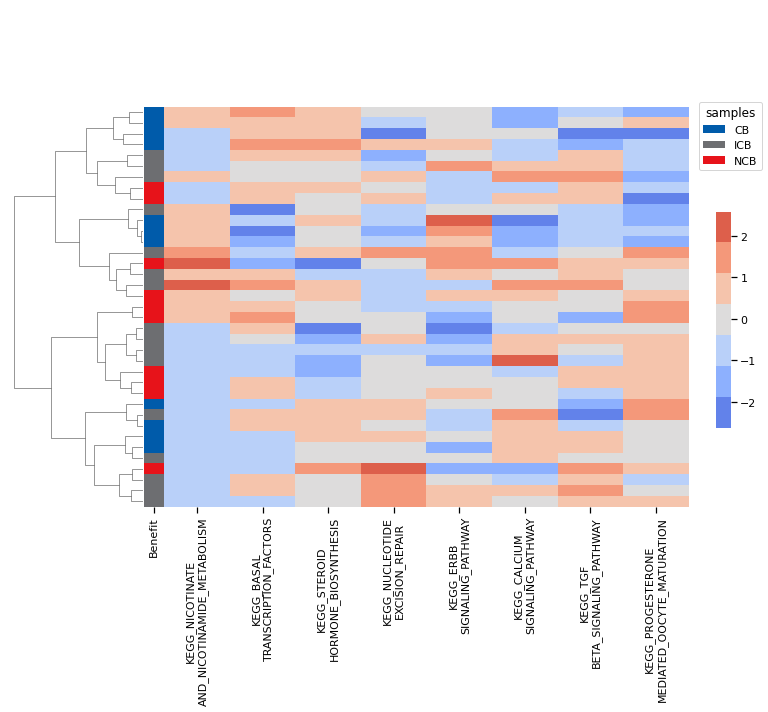

In [54]:
dc = {2:"#e40c69",1:"#2e3092",3:'#6d6e71'}
#####################################################################
df_aveplot = df_os.set_index("index").copy()[os_list[:]]
col_colors = df_os.set_index("index")["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplot.columns = [secline(i) for i in df_aveplot.columns.tolist()]
df_aveplot.fillna(0,inplace=True)
#####################################################################


g1 = sns.clustermap(df_aveplot, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)
plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os.corr.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

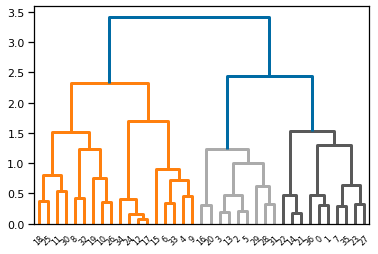

In [55]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplot), 'cosine'), method='ward', metric='cosine')
dn = dendrogram(linkage_data)
plt.show() 

[2 2 2 2 1 2 1 2 1 1 1 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 1 2 1 1 1 2 2]
0.005857303644845217
c1_CB: 7 c1_ICB: 7 c1_NCB: 4
c2_CB: 4 c2_ICB: 9 c2_NCB: 6


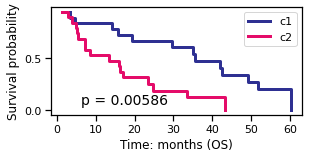

In [58]:
from scipy.cluster.hierarchy import fcluster
from sksurv.compare import compare_survival
import numpy as np

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)

def swapPositions(lis):
    newlis = []
    for i in lis:
        if i == 1:
            newlis.append(2)
        if i == 2:
            newlis.append(1)
    return newlis
    
df_os["cres"] = fl
#df_os["cres"] =swapPositions(fl)


y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)


#OS survival analysis
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))

df_os["OS_CNSR"] = df_os["OS_CNSR"]==1

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["OS_CNSR"], \
        speci_df["OS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

ax.text(0.12, 0.20, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (OS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os_onlyosscluster.corr.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

In [20]:
pfs_list

['KEGG_OTHER_GLYCAN_DEGRADATION',
 'KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE',
 'KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS',
 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES',
 'KEGG_RIBOFLAVIN_METABOLISM',
 'KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM',
 'KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION',
 'KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM',
 'KEGG_GALACTOSE_METABOLISM',
 'KEGG_ONE_CARBON_POOL_BY_FOLATE',
 'KEGG_BASE_EXCISION_REPAIR',
 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 'KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS',
 'KEGG_PEROXISOME',
 'KEGG_TYPE_I_DIABETES_MELLITUS',
 'KEGG_COLORECTAL_CANCER',
 'KEGG_THYROID_CANCER']

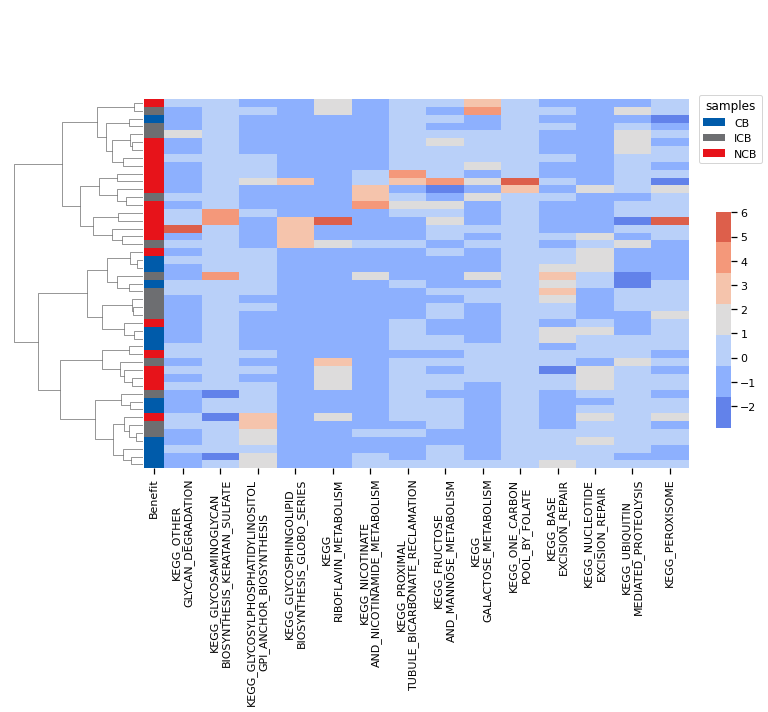

In [22]:
#####################################################################
df_aveplotpfs = df_os.set_index("index").copy()[pfs_list[:-3]]
col_colors = df_os.set_index("index")["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplotpfs.columns = [secline(i) for i in df_aveplotpfs.columns.tolist()]
df_aveplotpfs.fillna(0,inplace=True)
#####################################################################

g1 = sns.clustermap(df_aveplotpfs, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)

plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs.corr.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

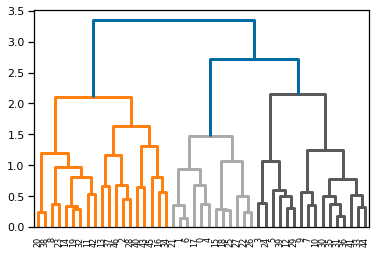

In [23]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplotpfs), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)
plt.show() 

fl = fcluster(linkage_data,2,criterion='maxclust')

df_os["cres"] = fl
#df_os["cres"] =swapPositions(fl)

3.3485373991723844e-06
c1_CB: 1 c1_ICB: 5 c1_NCB: 13
c2_CB: 12 c2_ICB: 9 c2_NCB: 7
True


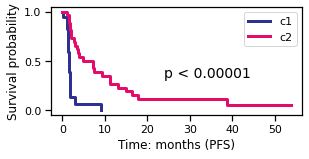

In [26]:
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))
df_os["PFS_CNSR"] = df_os["PFS_CNSR"]==1

#dc = {2:'#6d6e71',1:"#2e3092",3:"#e40c69"}

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["PFS_CNSR"], \
        speci_df["PFS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

#ax.text(0.45, 0.45, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,verticalalignment='top')
print(pvalue< 0.00001)
ax.text(0.45, 0.45, "p < 0.00001", transform=ax.transAxes, fontsize=14, verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (PFS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs_onlypfscluster.corr.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

from scipy.cluster.hierarchy import fcluster

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)
df_os["cres"] = fl
#df_os["cres"] = [1 if i != 2 else i for i in fl ]
#print(df_sns["cres"]!=3)
set(df_os["cres"])

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
#print(pdf1.loc[ix]["OS"])
ax = kmf_control.fit(pdf1.loc[ix]["OS"], pdf1.loc[ix]["OS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["OS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("OS")
plt.tight_layout()

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(pdf1.loc[ix]["PFS"], pdf1.loc[ix]["PFS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["PFS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("PFS")
plt.tight_layout()